# Group Assignment: Data Preparation and Visualization

## 1. Group members


Shefali Bisht
Megha Sree Nalla
Genero Molina
Siddharth Ram Mantri
***

## 2. Contribution report

After completing the assignment, please answer the following questions **as a group** by adding your answers within this markdown block.

1. In a few sentences, describe each group member's individual contributions to the submission. Be as specific as possible (e.g. coordinated group efforts, specific problems answered, specific problems reviewed/revised, sections of the submission written, etc.).

    < Add your responses here>


2. In a few sentences, describe what was learned in completing this assignment. In particular, describe what was learned through the **specific individual contributions** mentioned above.
    
    < Add your responses here>

***

## 3. Assignment

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker SQLPython Container directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. A single Jupyter Notebook (.ipynb).  **You must run all cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. A PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [1]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company, ZoomZoom. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@zoomzoom.com

To: datascienceteam@zoomzoom.com

Subject: Data request for shareholder meeting

For our next shareholder meeting, we need to provide more information about sales performance across product lines.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Popularity of products (4 most popular and 4 least popular)
2. Across all products, how are they trending?
3. How well are we meeting our weekly sales targets for scooters? for automobiles?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the popularity of products

1. Write a SELECT query that returns the total unit sales for each product model from January 1, 2016 to now.  The table should have two columns, `model` and `total_unit_sales`, with one row for each model ordered by `total_unit_sales` in *descending* order. 


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_model`.


3. Display the rows in `sales_by_model` corresponding to the 4 most popular products based on unit sales in *descending* order.


4. Display the rows in `sales_by_model` corresponding to the 4 least popular products based on unit sales in *ascending* order.


5. Visualize unit sales by product model for the most and least popular products discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total unit sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [13]:
#1.1
result = engine.execute("select p.model, sum(s.sales_amount) as total_unit_sales from sales s join products p on s.product_id = p.product_id where s.sales_transaction_date >= '2016-01-01' group by p.model order by total_unit_sales desc;").fetchall()


In [14]:
#1.2 create dataframe
sales_by_model = pd.DataFrame(result, columns=['model', 'total_unit_sales'])
print(sales_by_model)

                 model  total_unit_sales
0            Model Chi      7.992700e+07
1          Model Sigma      5.213800e+07
2          Model Gamma      4.410980e+07
3        Model Epsilon      2.653350e+07
4                Lemon      4.730405e+06
5                  Bat      4.202270e+06
6  Bat Limited Edition      3.881165e+06
7         Lemon Zester      3.751543e+05


In [19]:
#1.3 display 4 most popular models   (dataframe is already sorted in descending order)
most_popular_models= sales_by_model.head(4) 
print(most_popular_models)

           model  total_unit_sales
0      Model Chi        79927000.0
1    Model Sigma        52138000.0
2    Model Gamma        44109800.0
3  Model Epsilon        26533500.0


In [20]:
#1.4 display 4 least popular models (sorting the dataframe in ascending orders and taking the 1st four rows)
least_popular_models = sales_by_model.sort_values(by = 'total_unit_sales', ascending = True).head(4)
print(least_popular_models)

                 model  total_unit_sales
7         Lemon Zester      3.751543e+05
6  Bat Limited Edition      3.881165e+06
5                  Bat      4.202270e+06
4                Lemon      4.730405e+06


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='model', ylabel='total_unit_sales'>

Text(0.5, 1.0, 'Total Unit Sales of Most Popular Products (Jan 1, 2016 to Present)')

Text(0.5, 0, 'Product Model')

Text(0, 0.5, 'Total Unit Sales')

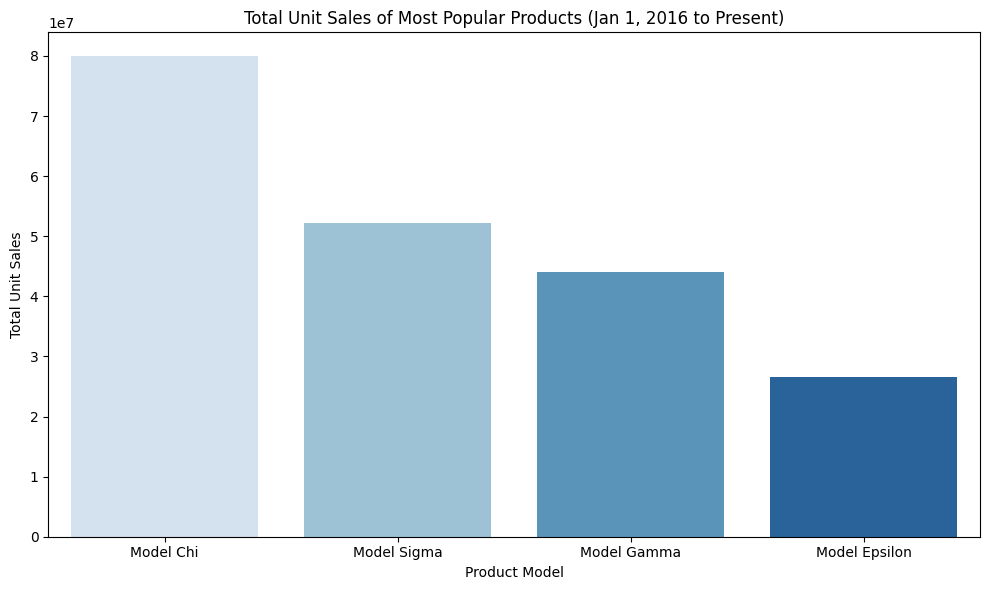

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='model', ylabel='total_unit_sales'>

Text(0.5, 1.0, 'Total Unit Sales of Least Popular Products (Jan 1, 2016 to Present)')

Text(0.5, 0, 'Product Model')

Text(0, 0.5, 'Total Unit Sales')

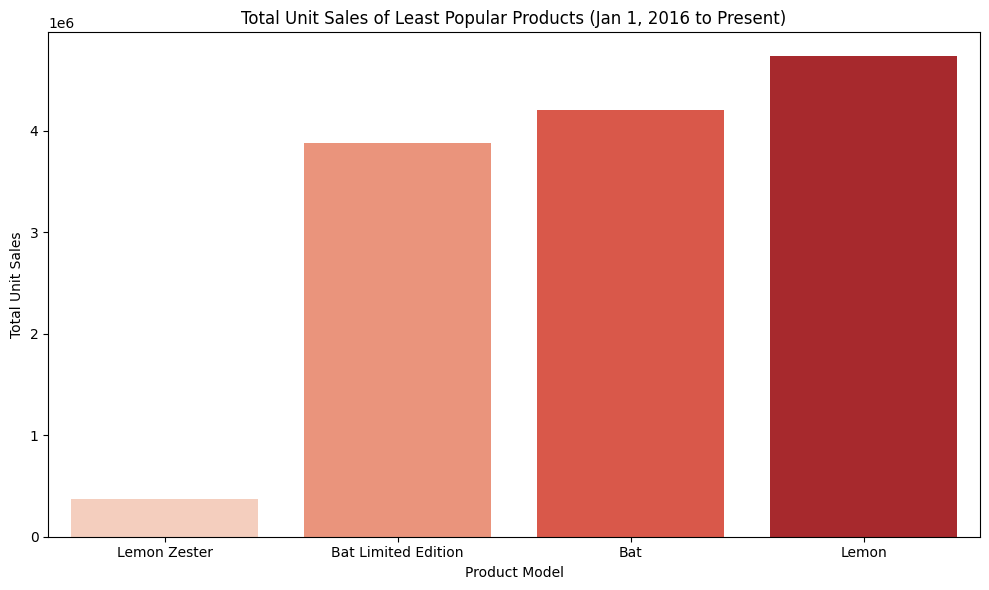

In [37]:
#1.5 visualize most and least popular models

# Plotting for Most popular products
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='total_unit_sales', data=most_popular_models, palette='Blues')
plt.title('Total Unit Sales of Most Popular Products (Jan 1, 2016 to Present)')
plt.xlabel('Product Model')
plt.ylabel('Total Unit Sales')
plt.tight_layout()
plt.show()

# Plotting for least popular products
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='total_unit_sales', data=least_popular_models, palette='Reds')
plt.title('Total Unit Sales of Least Popular Products (Jan 1, 2016 to Present)')
plt.xlabel('Product Model')
plt.ylabel('Total Unit Sales')
plt.tight_layout()
plt.show()

## Part 2: Visualizing product line trends

Create a table and visualization of historical cumulative sales amounts by product model. 

To do this, perform the following steps:

1. Write a SELECT query that returns the cumulative total sales amount for each product model from January 1, 2016 to now.  The table should have five columns, `product_id`, `model`, `product_type`, `sales_transaction_date`, and `cumulative_sales`. `cumulative_sales` represents the cumulative sales amount from January 1, 2016 to the `sales_transaction_date` for products identified by `model`.  There should be a row for each distinct combination of `model` and `sales_transaction_date` in the `sales` table (*hint*: window function)


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_byproduct`.
    
    
3. Appropriately visualize historical cumulative sales by product across sales transaction dates separately for product types *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, variable names like `sales_transaction_date` and `product_type` are replaced with appropriate text like 'Date' and 'Type', etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [24]:
#2.1
query2 = """with cte as (
select p.model, p.product_id, p.product_type, cast(s.sales_transaction_date as Date) as sales_transaction_date, 
	sum(s.sales_amount) sales_amount
from sales s 
right join products p on s.product_id = p.product_id 
where s.sales_transaction_date >= '2016-01-01' 
group by p.model, p.product_id, p.product_type, cast(s.sales_transaction_date as Date)
)
select model, product_id, product_type,sales_transaction_date, sales_amount, 
sum(sales_amount) over(partition by  model, product_id, product_type order by sales_transaction_date) as cumulative_sales
from cte
order by  model, product_id, product_type, sales_transaction_date"""
engine.execute(query2).fetchall()

[('Bat', 7, 'scooter', datetime.date(2016, 10, 10), 5399.909999999999, 5399.909999999999),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 11), 3599.9399999999996, 8999.849999999999),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 12), 5819.902999999999, 14819.752999999997),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 13), 5759.9039999999995, 20579.656999999996),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 14), 2879.952, 23459.608999999997),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 15), 5879.901999999999, 29339.510999999995),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 16), 7739.871, 37079.382),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 17), 5099.915, 42179.297),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 18), 6599.8899999999985, 48779.187),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 19), 6779.887, 55559.074),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 20), 5879.901999999999, 61438.976),
 ('Bat', 7, 'scooter', datetime.date(2016, 10, 21), 3479.942, 64918.

In [8]:
#2.2 create dataframe


In [9]:
#2.3


## Part 3: Weekly sales targets

We define the target sales of a week as the average of the sales over the preceding 3 weeks. Create a table and visualization of weekly sales amounts and target sales by product type from January 1, 2016 to now.  

To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `product_type`,`sales_transaction_week`, `weekly_sales`, and `weekly_target`.  `weekly_sales` represents the total sales amount for the week of `sales_transaction_date` for product type identified by `product_type`.  There should be a row for each distinct combination of `product_type` and `sales_transaction_week` in the `sales` table. Additionally, `weekly_target` is the average of the 3 preceding `weekly_sales` values not including the current week (*hint*: window frames).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `product_weekly_sales`.
    
    
   3. Appropriately visualize weekly sales and weekly target over time *in a single plot* by product type. In other words, there should be one visualization for scooters and one for automobiles. It is then your choice whether those visualizations are subplots or independent. Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, variable names like `sales_transaction_date` and `product_type` are replaced with appropriate text like 'Date' and 'Type', etc.). 

**Hint**: In order to get the week from a date, we can use the transformation function, `DATE_TRUNC`. An example query is provided in the next code block and the help page can be found here: https://www.postgresql.org/docs/current/functions-datetime.html

In [10]:
# hint:
query_hint = """
SELECT  sales_transaction_date,
		DATE_TRUNC('month',sales_transaction_date)::DATE AS month,
		DATE_TRUNC('year',sales_transaction_date)::DATE AS year,
		DATE_TRUNC('week',sales_transaction_date)::DATE AS week
FROM sales
LIMIT 10;
"""

pd.read_sql_query(query_hint, engine)

,sales_transaction_date,month,year,week
0,2017-07-19 08:38:41,2017-07-01,2017-01-01,2017-07-17
1,2017-08-14 09:59:02,2017-08-01,2017-01-01,2017-08-14
2,2019-01-20 10:40:11,2019-01-01,2019-01-01,2019-01-14
3,2017-05-09 14:20:04,2017-05-01,2017-01-01,2017-05-08
4,2019-05-21 20:03:21,2019-05-01,2019-01-01,2019-05-20
5,2017-06-14 11:37:10,2017-06-01,2017-01-01,2017-06-12
6,2019-02-26 09:25:19,2019-02-01,2019-01-01,2019-02-25
7,2017-11-15 01:28:23,2017-11-01,2017-01-01,2017-11-13
8,2017-06-25 22:53:37,2017-06-01,2017-01-01,2017-06-19
9,2019-01-13 08:28:44,2019-01-01,2019-01-01,2019-01-07


In [25]:
#3.1
query3 = """with cte as (
select p.product_type, date_trunc('week', s.sales_transaction_date)::DATE as sales_transaction_week, 
	sum(s.sales_amount) as weekly_sales
from sales s 
join products p on s.product_id = p.product_id 
where s.sales_transaction_date >= '2016-01-01' 
group by p.product_type,date_trunc('week', s.sales_transaction_date)::DATE
)
select product_type, sales_transaction_week,weekly_sales,
AVG(weekly_sales) over(partition by product_type order by sales_transaction_week rows between 3 preceding and 1 preceding) as weekly_target
from cte
order by product_type, sales_transaction_week """

engine.execute(query3).fetchall()

[('automobile', datetime.date(2015, 12, 28), 65500.0, None),
 ('automobile', datetime.date(2016, 1, 4), 845450.0, 65500.0),
 ('automobile', datetime.date(2016, 1, 11), 570900.0, 455475.0),
 ('automobile', datetime.date(2016, 1, 18), 826350.0, 493950.0),
 ('automobile', datetime.date(2016, 1, 25), 396950.0, 747566.6666666666),
 ('automobile', datetime.date(2016, 2, 1), 1012400.0, 598066.6666666666),
 ('automobile', datetime.date(2016, 2, 8), 349500.0, 745233.3333333334),
 ('automobile', datetime.date(2016, 2, 15), 560700.0, 586283.3333333334),
 ('automobile', datetime.date(2016, 2, 22), 718950.0, 640866.6666666666),
 ('automobile', datetime.date(2016, 2, 29), 1209350.0, 543050.0),
 ('automobile', datetime.date(2016, 3, 7), 998250.0, 829666.6666666666),
 ('automobile', datetime.date(2016, 3, 14), 537400.0, 975516.6666666666),
 ('automobile', datetime.date(2016, 3, 21), 1159850.0, 915000.0),
 ('automobile', datetime.date(2016, 3, 28), 748500.0, 898500.0),
 ('automobile', datetime.date(201

In [12]:
#3.2


In [13]:
#3.3



## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

 1. (Part 1) What are some potential hypotheses as to why the the most (least) popular products have the most (least) unit sales?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

2. (Part 2): How would you characterize the historical performance of the products visualized in Part 2 (e.g. is growth linear, exponential, constant, or etc.)? Are there major differences across the product types? Describe some of the trends in relative performance over time for the products.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 

3. (Part 3): How would you characterize the weekly sales by product type? Comment on seasonality and any unusual features. How does this compare to the sales targets? Is there seasonality in when we exceed the target? What are some potential hypotheses for what you have described?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
